In [1]:
#animation of windfields
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cmocean  
import numpy as np 
import sys
import xarray as xr

In [9]:
filepath_norkyst = f'/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240402.nc'
nor = xr.open_dataset(filepath_norkyst)
nor.head()

<xarray.Dataset> Size: 18kB
Dimensions:           (time: 5, Y: 5, X: 5, s_rho: 5, s_w: 5)
Coordinates:
  * time              (time) datetime64[ns] 40B 2024-04-02 ... 2024-04-02T04:...
  * s_rho             (s_rho) float64 40B -0.9799 -0.9403 ... -0.8634 -0.8261
  * X                 (X) float64 40B 0.0 800.0 1.6e+03 2.4e+03 3.2e+03
  * Y                 (Y) float64 40B 0.0 800.0 1.6e+03 2.4e+03 3.2e+03
  * s_w               (s_w) float64 40B -1.0 -0.96 -0.9208 -0.8823 -0.8446
    lon               (Y, X) float64 200B ...
    lat               (Y, X) float64 200B ...
Data variables: (12/18)
    Uwind_eastward    (time, Y, X) float32 500B ...
    Vwind_northward   (time, Y, X) float32 500B ...
    zeta              (time, Y, X) float32 500B ...
    ubar_eastward     (time, Y, X) float32 500B ...
    vbar_northward    (time, Y, X) float32 500B ...
    u_eastward        (time, s_rho, Y, X) float32 2kB ...
    ...                ...
    hc                float64 8B ...
    Cs_r              (s_rho) float64 40B ...
    Cs_w              (s_w) float64 40B ...
    h                 (Y, X) float32 100B ...
    projection_stere  int32 4B ...
    depth             int32 4B ...
Attributes: (12/33)
    id:                      572391bb-878e-4153-bac1-2bd854d73fe4
    naming_authority:        no.met
    operational_status:      scientific
    iso_topic_category:      oceans
    activity_type:           Numerical Simulation
    keywords_vocabulary:     GCMDSK:GCMD Science Keywords:https://gcmd.earthd...
    ...                      ...
    project:                 Norkyst_v3
    license:                 https://spdx.org/licenses/CC-BY-4.0 (CC-BY-4.0)
    title:                   Norkyst-800m - ROMS, Norkyst-800m ocean hindcast...
    summary:                 Norkyst-800m (Norwegian Coast 800m horizontal re...
    title_no:                Hindcast prognoser fra havmodellen Norkyst-800m,...
    summary_no:              NorKyst-800m (Norske kystområder med 800m horiso...

GOAL:
$\newline$
1. Rewrite animation script to support one-dimensional nc files
2. Also make one script that animates the truth model, the ML results and the differences in a subplot to easily review differences.

In [3]:
#Trying with one result file:
file_path = f'/lustre/storeB/project/fou/hi/foccus/experiments/ngpus-2017-24/inference'
ds_result = xr.open_dataset(f'{file_path}/lam-48h-step_002016.nc')

In [4]:
ds_result.head()
#ds_result.dims
#ds_result.time.values

<xarray.Dataset> Size: 3kB
Dimensions:            (time: 5, values: 5)
Coordinates:
  * time               (time) datetime64[ns] 40B 2024-04-02 ... 2024-04-02T12...
Dimensions without coordinates: values
Data variables: (12/27)
    latitude           (values) float32 20B ...
    longitude          (values) float32 20B ...
    h                  (time, values) float32 100B ...
    salinity_0         (time, values) float32 100B ...
    sea_mask           (time, values) float32 100B ...
    temperature_0      (time, values) float32 100B ...
    ...                 ...
    rain               (time, values) float32 100B ...
    river_binary_mask  (time, values) float32 100B ...
    sin_julian_day     (time, values) float32 100B ...
    sin_latitude       (time, values) float32 100B ...
    sin_local_time     (time, values) float32 100B ...
    sin_longitude      (time, values) float32 100B ...

In [5]:
u_wind = ds_result["Uwind"]
v_wind = ds_result["Vwind"]
u_speed = ds_result["u_eastward_0"]
v_speed = ds_result["v_northward_0"]
longitude = ds_result["longitude"]
latitude = ds_result["latitude"]

In [6]:
#plt.scatter(longitude.values, latitude.values, u_speed.values[0])

In [1]:
#from script_animation_results import results_animation

In [ ]:
dir_out = f'/lustre/storeB/project/fou/hi/foccus/malene/ocean-ai/plot/figures'

In [ ]:
#results_animation(file_path='/lustre/storeB/project/fou/hi/foccus/experiments/ngpus-2017-24/inference/lam-48h-step_002016.nc', variable= 'Uwind', dir=dir_out, frame=16, start_time=0)

Gifen printes bare ut for tidssteg 1 og resten av bildene blir bare hvite. undersøk feilen

In [ ]:
"""def results_animation(file_path,variable, start_time):
    ds = xr.open_dataset(file_path) #add isel when its relevant to select which s-layer you want to look at (per now it is only the surface layer so)
    ds_var = ds[f'{variable}']
    longitude = ds["longitude"]
    latitude = ds["latitude"]
    fig,ax = plt.subplots(figsize = (12,8))
    sc = ax.scatter(longitude.values, latitude.values, c=ds_var.isel(time=start_time).values, cmap = cmocean.cm.speed)
    cbar = plt.colorbar(sc, ax=ax, orientation = "vertical", label = variable)
    return sc

#results_animation(file_path='/lustre/storeB/project/fou/hi/foccus/experiments/ngpus-2017-24/inference/lam-48h-step_002016.nc', variable="Uwind", start_time=0)
"""

'def results_animation(file_path,variable, start_time):\n    ds = xr.open_dataset(file_path) #add isel when its relevant to select which s-layer you want to look at (per now it is only the surface layer so)\n    ds_var = ds[f\'{variable}\']\n    longitude = ds["longitude"]\n    latitude = ds["latitude"]\n    fig,ax = plt.subplots(figsize = (12,8))\n    sc = ax.scatter(longitude.values, latitude.values, c=ds_var.isel(time=start_time).values, cmap = cmocean.cm.speed)\n    cbar = plt.colorbar(sc, ax=ax, orientation = "vertical", label = variable)\n    return sc\n\n#results_animation(file_path=\'/lustre/storeB/project/fou/hi/foccus/experiments/ngpus-2017-24/inference/lam-48h-step_002016.nc\', variable="Uwind", start_time=0)\n'

In [ ]:
#results_animation(file_path='/lustre/storeB/project/fou/hi/foccus/experiments/ngpus-2017-24/inference/lam-48h-step_002016.nc', variable="Uwind", start_time=2)

In [ ]:
"""
u_val = ds_result["Uwind"].isel(time=0).values
#To replace nan np.where says if the value in the u_val file is nan, then replace it with zero/ie return zero.
#If not, return the original value of the u_val
replace_nan = np.where(np.isnan(u_val), 0, u_val)
if np.any(replace_nan != 0):
    print(f'There are other exisiting values than nan')
else:
    print(f'All nan values in the chosen timestep')
"""

'\nu_val = ds_result["Uwind"].isel(time=0).values\n#To replace nan np.where says if the value in the u_val file is nan, then replace it with zero/ie return zero.\n#If not, return the original value of the u_val\nreplace_nan = np.where(np.isnan(u_val), 0, u_val)\nif np.any(replace_nan != 0):\n    print(f\'There are other exisiting values than nan\')\nelse:\n    print(f\'All nan values in the chosen timestep\')\n'

In [ ]:
"""

new_ds = xr.open_dataset(f'{file_path}/lam-48h.nc')
new_ds
u_val_new = new_ds["Uwind"].isel(time = 1).values
def check_if_vals(ds):
    replace_nan_new = np.where(np.isnan(ds), 0, ds)
    if np.any(replace_nan_new != 0):
        print(f'There are other exisiting values than nan')
    else:
        print(f'All nan values in the chosen timestep')

new_ds_v = new_ds["Vwind"].isel(time=10).values
check_if_vals(new_ds_v)

ds_result_v = ds_result["Vwind"].isel(time=1).values
check_if_vals(ds_result_v)

ds_result_speed_u = ds_result["u_eastward_0"].isel(time=4).values
check_if_vals(ds_result_speed_u)

ds_result_speed_v = ds_result["v_northward_0"].isel(time=8).values
check_if_vals(ds_result_speed_v)

"""

'\n\nnew_ds = xr.open_dataset(f\'{file_path}/lam-48h.nc\')\nnew_ds\nu_val_new = new_ds["Uwind"].isel(time = 1).values\ndef check_if_vals(ds):\n    replace_nan_new = np.where(np.isnan(ds), 0, ds)\n    if np.any(replace_nan_new != 0):\n        print(f\'There are other exisiting values than nan\')\n    else:\n        print(f\'All nan values in the chosen timestep\')\n\nnew_ds_v = new_ds["Vwind"].isel(time=10).values\ncheck_if_vals(new_ds_v)\n\nds_result_v = ds_result["Vwind"].isel(time=1).values\ncheck_if_vals(ds_result_v)\n\nds_result_speed_u = ds_result["u_eastward_0"].isel(time=4).values\ncheck_if_vals(ds_result_speed_u)\n\nds_result_speed_v = ds_result["v_northward_0"].isel(time=8).values\ncheck_if_vals(ds_result_speed_v)\n\n'

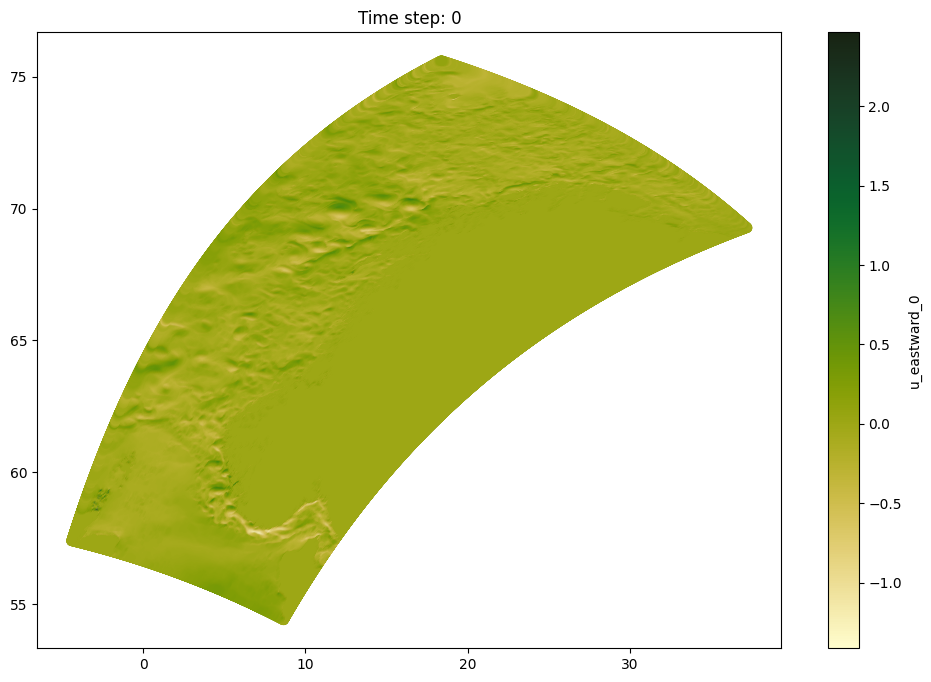

In [ ]:
#there are exisiting values for the speed values from the datasets, I will therefore look away from the winds per now 
#results_animation(file_path='/lustre/storeB/project/fou/hi/foccus/experiments/ngpus-2017-24/inference/lam-48h-step_002016.nc', variable= 'u_eastward_0', dir = dir_out, frame=16, start_time=0)
#DET FUNKA YIHAAAAA

In [ ]:
#Ill repeat the process for v-wind and abs value for the u and v wind

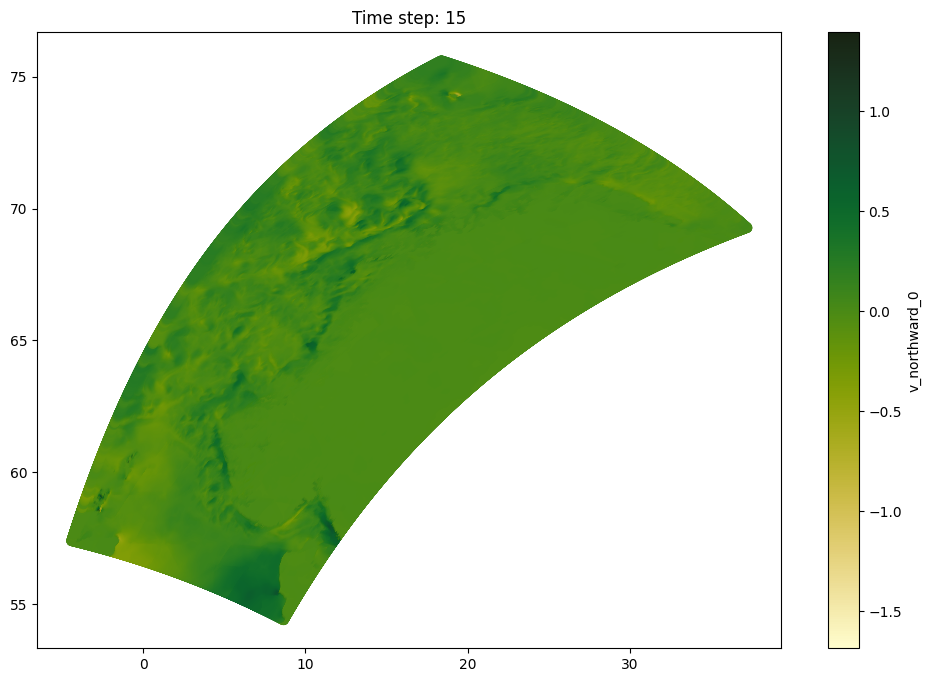

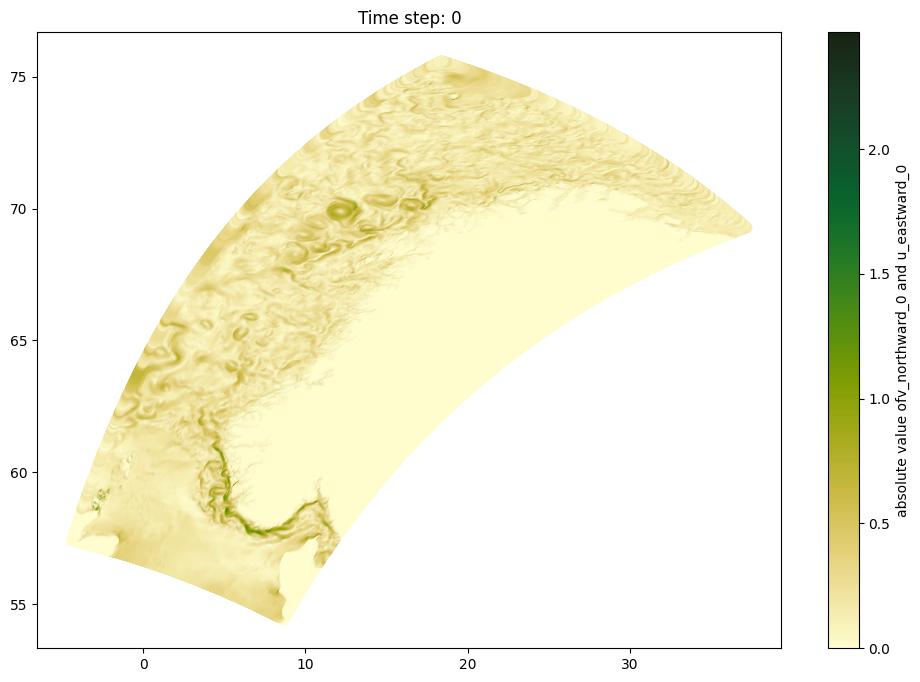

In [ ]:
#from script_animation_results import results_absolute_val_animation
#siden du kjører for færre tidssteg, vurder å øke antall intervaller!!

In [105]:
#test for å finne feil
dir=f'/lustre/storeB/project/fou/hi/foccus/'
file_res = f'/experiments/ngpus-2017-24/inference/lam-48h-step_002016.nc'
res = xr.open_dataset(f'{dir}experiments/ngpus-2017-24/inference/lam-48h-step_002016.nc').isel(time=slice(0,16))
nor1 = xr.open_dataset('/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240402.nc', engine='netcdf4')
nor2 = xr.open_dataset('/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240403.nc', engine='netcdf4')

In [4]:
nor1.head()

<xarray.Dataset> Size: 18kB
Dimensions:           (time: 5, Y: 5, X: 5, s_rho: 5, s_w: 5)
Coordinates:
  * time              (time) datetime64[ns] 40B 2024-04-02 ... 2024-04-02T04:...
  * s_rho             (s_rho) float64 40B -0.9799 -0.9403 ... -0.8634 -0.8261
  * X                 (X) float64 40B 0.0 800.0 1.6e+03 2.4e+03 3.2e+03
  * Y                 (Y) float64 40B 0.0 800.0 1.6e+03 2.4e+03 3.2e+03
  * s_w               (s_w) float64 40B -1.0 -0.96 -0.9208 -0.8823 -0.8446
    lon               (Y, X) float64 200B ...
    lat               (Y, X) float64 200B ...
Data variables: (12/18)
    Uwind_eastward    (time, Y, X) float32 500B ...
    Vwind_northward   (time, Y, X) float32 500B ...
    zeta              (time, Y, X) float32 500B ...
    ubar_eastward     (time, Y, X) float32 500B ...
    vbar_northward    (time, Y, X) float32 500B ...
    u_eastward        (time, s_rho, Y, X) float32 2kB ...
    ...                ...
    hc                float64 8B ...
    Cs_r              (s_rho) float64 40B ...
    Cs_w              (s_w) float64 40B ...
    h                 (Y, X) float32 100B ...
    projection_stere  int32 4B ...
    depth             int32 4B ...
Attributes: (12/33)
    id:                      572391bb-878e-4153-bac1-2bd854d73fe4
    naming_authority:        no.met
    operational_status:      scientific
    iso_topic_category:      oceans
    activity_type:           Numerical Simulation
    keywords_vocabulary:     GCMDSK:GCMD Science Keywords:https://gcmd.earthd...
    ...                      ...
    project:                 Norkyst_v3
    license:                 https://spdx.org/licenses/CC-BY-4.0 (CC-BY-4.0)
    title:                   Norkyst-800m - ROMS, Norkyst-800m ocean hindcast...
    summary:                 Norkyst-800m (Norwegian Coast 800m horizontal re...
    title_no:                Hindcast prognoser fra havmodellen Norkyst-800m,...
    summary_no:              NorKyst-800m (Norske kystområder med 800m horiso...

In [ ]:
res.time.values

array(['2024-04-02T00:00:00.000000000', '2024-04-02T03:00:00.000000000',
       '2024-04-02T06:00:00.000000000', '2024-04-02T09:00:00.000000000',
       '2024-04-02T12:00:00.000000000', '2024-04-02T15:00:00.000000000',
       '2024-04-02T18:00:00.000000000', '2024-04-02T21:00:00.000000000',
       '2024-04-03T00:00:00.000000000', '2024-04-03T03:00:00.000000000',
       '2024-04-03T06:00:00.000000000', '2024-04-03T09:00:00.000000000',
       '2024-04-03T12:00:00.000000000', '2024-04-03T15:00:00.000000000',
       '2024-04-03T18:00:00.000000000', '2024-04-03T21:00:00.000000000'],
      dtype='datetime64[ns]')

In [89]:
#ds2_var = xr.concat([nor1["zeta"],nor2["zeta"]].)
ny = xr.open_mfdataset(['/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240402.nc', '/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240403.nc']).isel(s_rho=-1)
ny_zeta = ny["zeta"].resample(time='3H').mean(dim='time')
zeta = np.array(ny_zeta.values)
zeta = zeta.reshape(zeta.shape[-3],-3)
zeta.shape
#ny_zeta_t.time.values



/lustre/storeB/project/fou/hi/foccus/.venv/lib64/python3.11/site-packages/xarray/groupers.py:487: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


(16, 3153556)

In [96]:
#blabla = res["zeta"].values.flatten()
res["zeta"].values.shape
#filled_zeta = res["zeta"].fillna()

(16, 3076056)

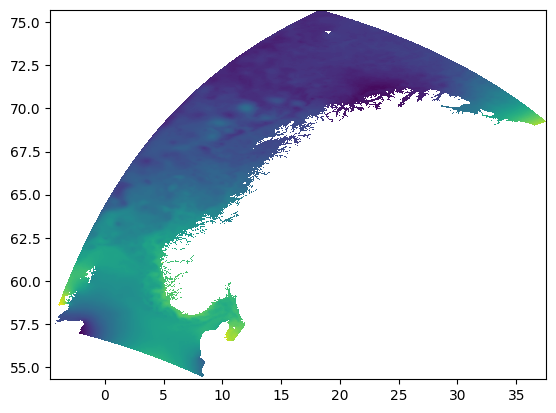

In [94]:
plt.pcolormesh(ny.lon, ny.lat, ny["zeta"][0])

In [20]:
ds = xr.open_mfdataset(['/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240402.nc', '/lustre/storeB/project/fou/hi/roms_hindcast/norkyst_v3/sdepth/2024/04/norkyst800-20240403.nc']).isel(s_rho=-1)
ds_var = ds["zeta"].resample(time='3H').mean(dim='time')
ds_var.head()

/lustre/storeB/project/fou/hi/foccus/.venv/lib64/python3.11/site-packages/xarray/groupers.py:487: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


<xarray.DataArray 'zeta' (time: 5, Y: 5, X: 5)> Size: 500B
dask.array<getitem, shape=(5, 5, 5), dtype=float32, chunksize=(1, 5, 5), chunktype=numpy.ndarray>
Coordinates:
    s_rho    float64 8B -0.004904
  * X        (X) float64 40B 0.0 800.0 1.6e+03 2.4e+03 3.2e+03
  * Y        (Y) float64 40B 0.0 800.0 1.6e+03 2.4e+03 3.2e+03
    lon      (Y, X) float64 200B dask.array<chunksize=(5, 5), meta=np.ndarray>
    lat      (Y, X) float64 200B dask.array<chunksize=(5, 5), meta=np.ndarray>
  * time     (time) datetime64[ns] 40B 2024-04-02 ... 2024-04-02T12:00:00
Attributes:
    units:                  meter
    grid:                   grid
    location:               face
    field:                  free-surface, scalar, series
    grid_mapping:           projection_stere
    long_name:              free surface elevation with respect to sea level ...
    standard_name:          sea_surface_height_above_geopotential_datum
    coverage_content_type:  modelResult
    time:                   time